In [5]:
import os
import matplotlib.pyplot as plt
import re

# Folder for plots
PLOT_DIR = "plots"
os.makedirs(PLOT_DIR, exist_ok=True)

def save_plot(fig, filename=None):
    """
    Save a Matplotlib figure as PNG in plots/ folder.
    If no filename is given, it uses the figure's title.
    """
    if filename is None:
        # Grab the title from the first axis
        title = fig.axes[0].get_title()
        if not title:
            filename = "plot"
        else:
            # clean title into safe filename
            filename = re.sub(r"[^a-zA-Z0-9]+", "_", title).strip("_").lower()
    
    filepath = f"{PLOT_DIR}/{filename}.png"
    fig.savefig(filepath, bbox_inches="tight")
    print(f"✅ Saved plot: {filepath}")


In [6]:
import os
import matplotlib.pyplot as plt
import re

# Folder for plots
PLOT_DIR = "plots"
os.makedirs(PLOT_DIR, exist_ok=True)

def save_plot(fig, filename=None):
    """
    Save a Matplotlib figure as PNG in plots/ folder.
    If no filename is given, it uses the figure's title.
    """
    if filename is None:
        # Grab the title from the first axis
        title = fig.axes[0].get_title()
        if not title:
            filename = "plot"
        else:
            # clean title into safe filename
            filename = re.sub(r"[^a-zA-Z0-9]+", "_", title).strip("_").lower()
    
    filepath = f"{PLOT_DIR}/{filename}.png"
    fig.savefig(filepath, bbox_inches="tight")
    print(f"✅ Saved plot: {filepath}")

In [11]:
import sys, os, pandas as pd, numpy as np, matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))
from src.utils import clean_column_names

RAW_PATH = "../data/raw/ecommerce.csv"
df = pd.read_csv(RAW_PATH, encoding="ISO-8859-1")
df = clean_column_names(df)
df["invoicedate"] = pd.to_datetime(df["invoicedate"], errors="coerce")
df["line_total"] = df["quantity"] * df["unitprice"]

In [12]:
df = df.drop_duplicates() 
sales = df[df["quantity"] > 0].copy()
returns = df[df["quantity"] < 0].copy()

sales.shape, returns.shape

kpis = {
    "total_revenue": sales["line_total"].sum(),
    "aov": sales.groupby("invoiceno")["line_total"].sum().mean(),
    "unique_customers": sales["customerid"].nunique(),
    "repeat_customers": sales.groupby("customerid")["invoiceno"].nunique().gt(1).sum(),
    "return_rate_pct": abs(returns["line_total"].sum()) / sales["line_total"].sum() * 100,
}
kpis

{'total_revenue': 10619986.684,
 'aov': 512.3498014280201,
 'unique_customers': 4339,
 'repeat_customers': 2845,
 'return_rate_pct': 8.417898784627138}

In [13]:

country_rev = (
    sales.groupby("country")["line_total"]
    .sum()
    .sort_values(ascending=False)
)

country_rev.head(10)

country
United Kingdom    8979619.974
Netherlands        285446.340
EIRE               283140.520
Germany            228678.400
France             209625.370
Australia          138453.810
Spain               61558.560
Switzerland         57067.600
Belgium             41196.340
Sweden              38367.830
Name: line_total, dtype: float64

✅ Saved plot: plots/top_10_countries_by_revenue.png


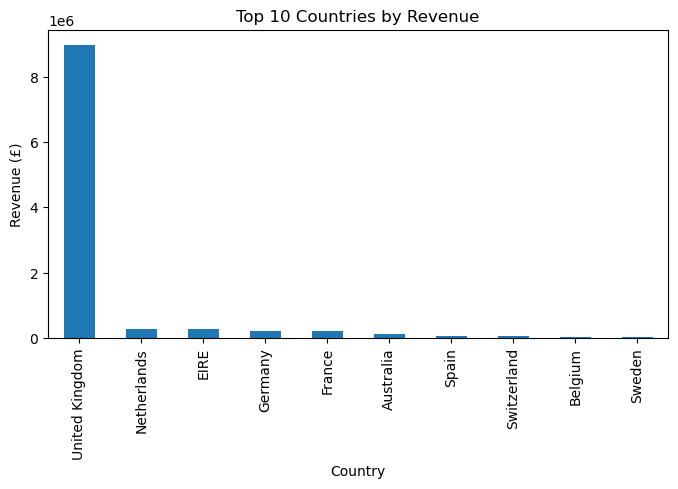

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
country_rev.head(10).plot(kind="bar", ax=ax)
ax.set_title("Top 10 Countries by Revenue")
ax.set_ylabel("Revenue (£)")
ax.set_xlabel("Country")

save_plot(fig)   # will auto-name from title
plt.show()

In [16]:
product_rev = (
    sales.groupby(["stockcode", "description"], dropna=False)["line_total"]
    .sum()
    .sort_values(ascending=False)
)

product_rev.head(10)

stockcode  description                       
DOT        DOTCOM POSTAGE                        206248.77
22423      REGENCY CAKESTAND 3 TIER              174156.54
23843      PAPER CRAFT , LITTLE BIRDIE           168469.60
85123A     WHITE HANGING HEART T-LIGHT HOLDER    104284.24
47566      PARTY BUNTING                          99445.23
85099B     JUMBO BAG RED RETROSPOT                94159.81
23166      MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POST       POSTAGE                                78101.88
M          Manual                                 77750.27
23084      RABBIT NIGHT LIGHT                     66870.03
Name: line_total, dtype: float64

✅ Saved plot: plots/top_10_products_by_revenue.png


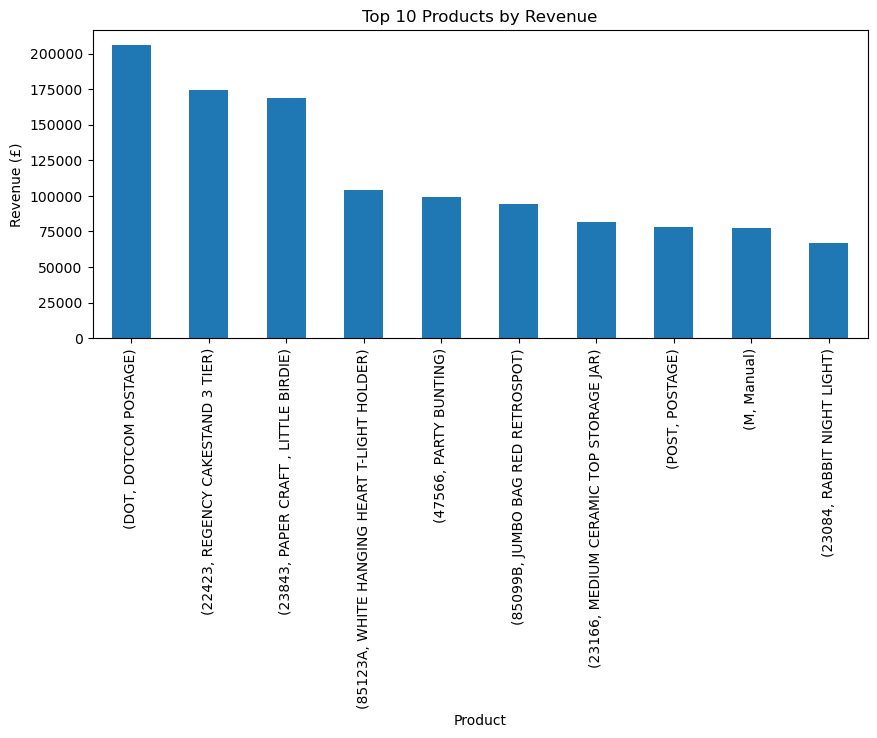

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
product_rev.head(10).plot(kind="bar", ax=ax)
ax.set_title("Top 10 Products by Revenue")
ax.set_ylabel("Revenue (£)")
ax.set_xlabel("Product")

save_plot(fig)   # auto-saves as plots/top_10_products_by_revenue.png
plt.show()